## 1.	Analyse des Tendances Générales

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
BC = pd.read_csv('Breast_Cancer.csv')
BC.head()
BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

## Exploration des données

### Distribution des âges

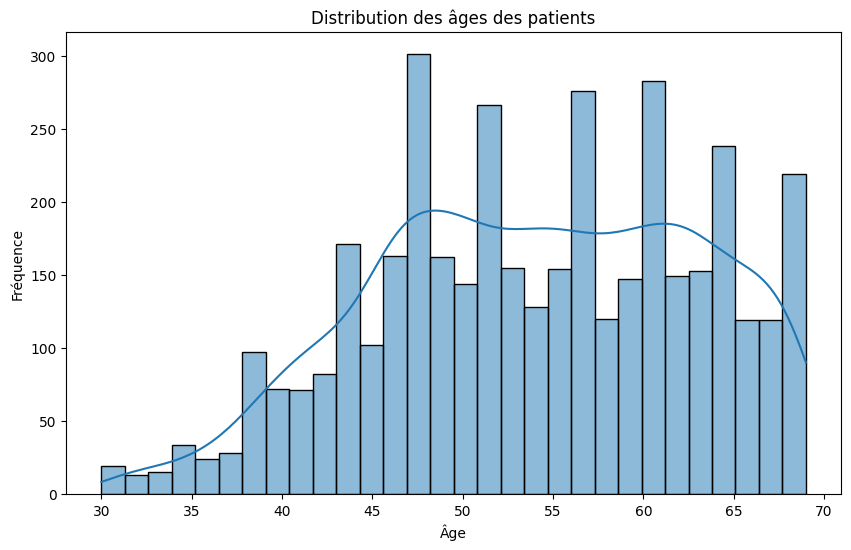

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(BC['Age'], bins=30, kde=True)
plt.title('Distribution des âges des patients')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

### Relation entre la taille de la tumeur et les mois de survie

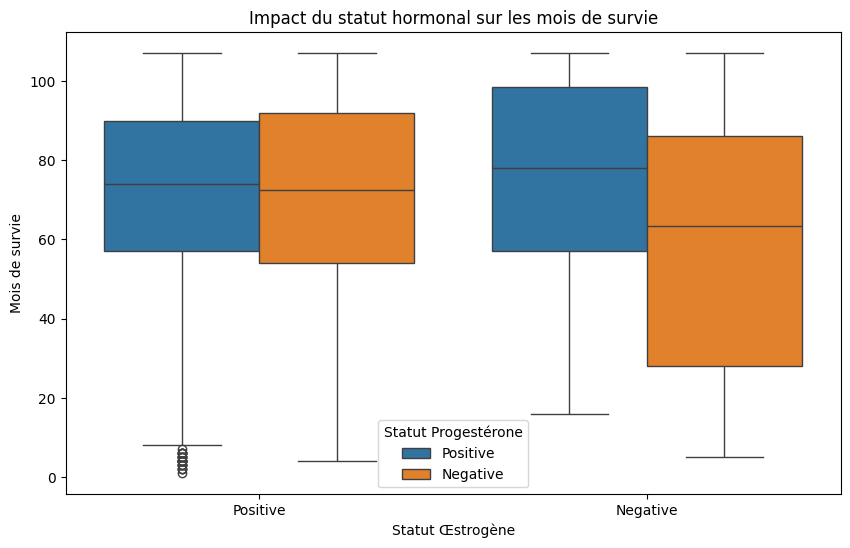

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=BC, x='Estrogen Status', y='Survival Months', hue='Progesterone Status')
plt.title('Impact du statut hormonal sur les mois de survie')
plt.xlabel('Statut Œstrogène')
plt.ylabel('Mois de survie')
plt.legend(title='Statut Progestérone')
plt.show()

## 2.	Analyse des relations cliniques 

### Relation entre la taille de la tumeur et la survie 

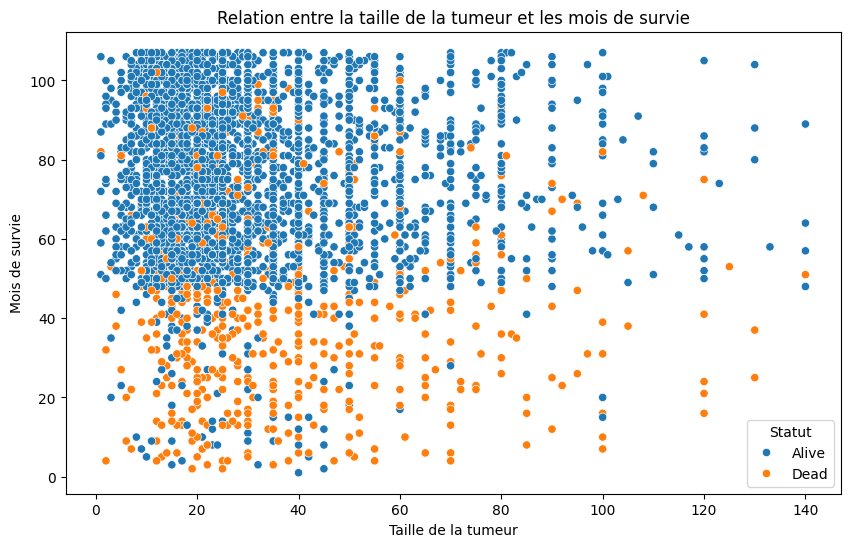

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=BC, x='Tumor Size', y='Survival Months', hue='Status')
plt.title('Relation entre la taille de la tumeur et les mois de survie')
plt.xlabel('Taille de la tumeur')
plt.ylabel('Mois de survie')
plt.legend(title='Statut')
plt.show()

### Analyse des corrélations

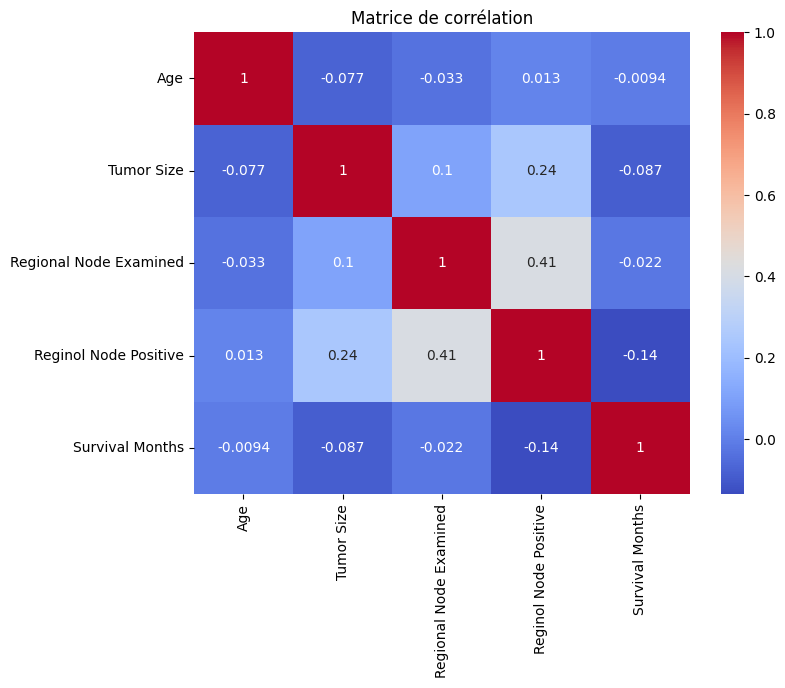

In [54]:
numerical_cols = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']

corr_matrix = BC[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

### Interaction entre le statut marital, l'âge et les mois de survie

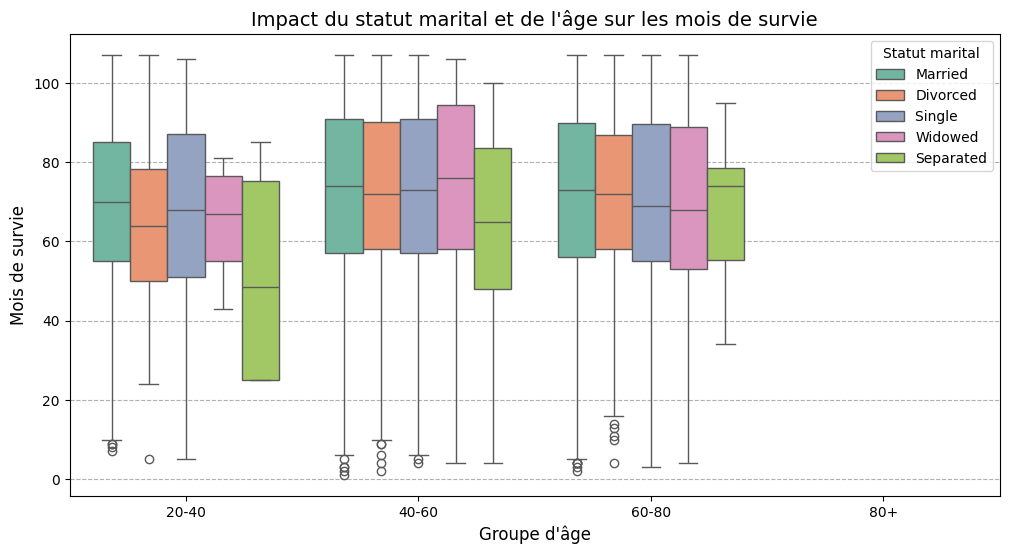

In [99]:
BC['Age_Group'] = pd.cut(
    BC['Age'],
    bins=[20, 40, 60, 80, 100],
    labels=['20-40', '40-60', '60-80', '80+']
)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=BC,
    x='Age_Group',
    y='Survival Months',
    hue='Marital Status',
    palette='Set2'
)
plt.title("Impact du statut marital et de l'âge sur les mois de survie", fontsize=14)
plt.xlabel("Groupe d'âge", fontsize=12)
plt.ylabel("Mois de survie", fontsize=12)
plt.legend(title="Statut marital")
plt.grid(axis='y', linestyle='--')
plt.show()

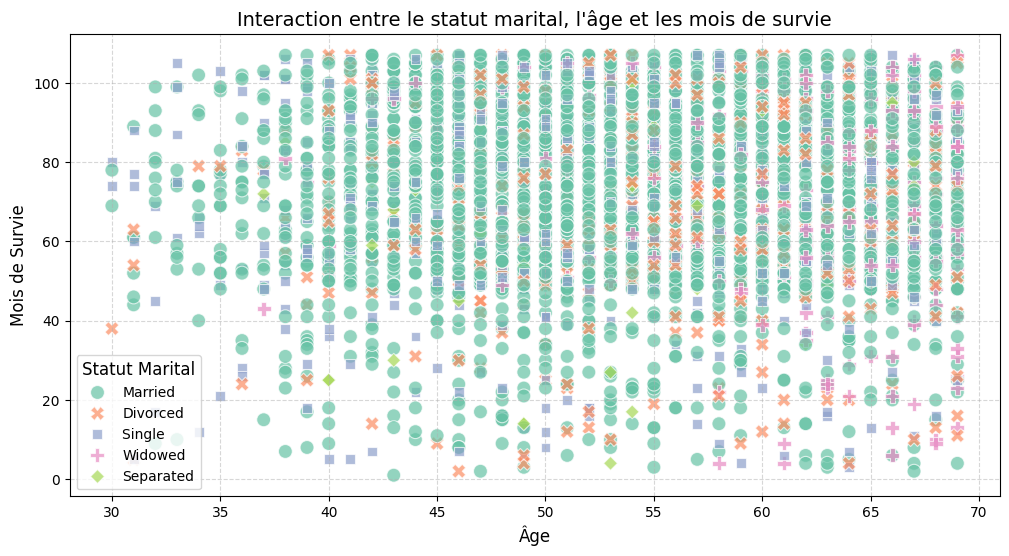

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation de l'interaction entre le statut marital, l'âge et les mois de survie
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=BC,
    x='Age',
    y='Survival Months',
    hue='Marital Status',
    style='Marital Status',
    palette='Set2',
    s=100,
    alpha=0.7
)
plt.title('Interaction entre le statut marital, l\'âge et les mois de survie', fontsize=14)
plt.xlabel('Âge', fontsize=12)
plt.ylabel('Mois de Survie', fontsize=12)
plt.legend(title='Statut Marital', fontsize=10, title_fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()


## 3.Identification des cas critiques 

### Critères pour détecter les cas critiques

In [82]:
# Seuils pour les cas critiques
tumor_threshold = BC['Tumor Size'].quantile(0.75)
survival_threshold = BC['Survival Months'].quantile(0.25)

# Identifier les cas critiques
BC['Critical Case'] = (
    (BC['Tumor Size'] > tumor_threshold) & 
    (BC['Survival Months'] < survival_threshold)
)

print(f"Nombre de cas critiques identifiés : {BC['Critical Case'].sum()}")

# Aperçu des cas critiques
critical_cases = BC[BC['Critical Case']]
print("Aperçu des cas critiques :")
critical_cases.head()

Nombre de cas critiques identifiés : 285
Aperçu des cas critiques :


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage,Age_Group,Critical Case
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive,T2,40-60,True
21,57,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,40,Positive,Positive,15,5,50,Alive,T2,40-60,True
30,47,White,Separated,T2,N1,IIB,Well differentiated,1,Regional,40,Positive,Positive,3,1,52,Alive,T2,40-60,True
40,57,White,Single,T3,N3,IIIC,Moderately differentiated,2,Regional,70,Positive,Positive,12,12,42,Dead,T3,40-60,True
66,31,White,Married,T3,N3,IIIC,Poorly differentiated,3,Regional,70,Positive,Positive,23,23,44,Dead,T3,20-40,True


### Analyse approfondie des caractéristiques des patientes concernées

#### Statistiques descriptives des cas critiques

In [71]:
# Statistiques descriptives des cas critiques
print("Statistiques descriptives des cas critiques :")
critical_cases.describe()

Statistiques descriptives des cas critiques :


,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,285.000000,285.000000,285.000000,285.000000,285.000000
mean,53.280702,61.438596,15.866667,7.691228,37.624561
std,9.790327,21.226990,8.971970,7.051328,15.248739
min,30.000000,39.000000,1.000000,1.000000,1.000000
25%,46.000000,45.000000,10.000000,2.000000,25.000000
50%,53.000000,55.000000,14.000000,5.000000,41.000000
75%,61.000000,70.000000,20.000000,11.000000,51.000000
max,69.000000,140.000000,57.000000,35.000000,55.000000


#### Répartition par statut hormonal

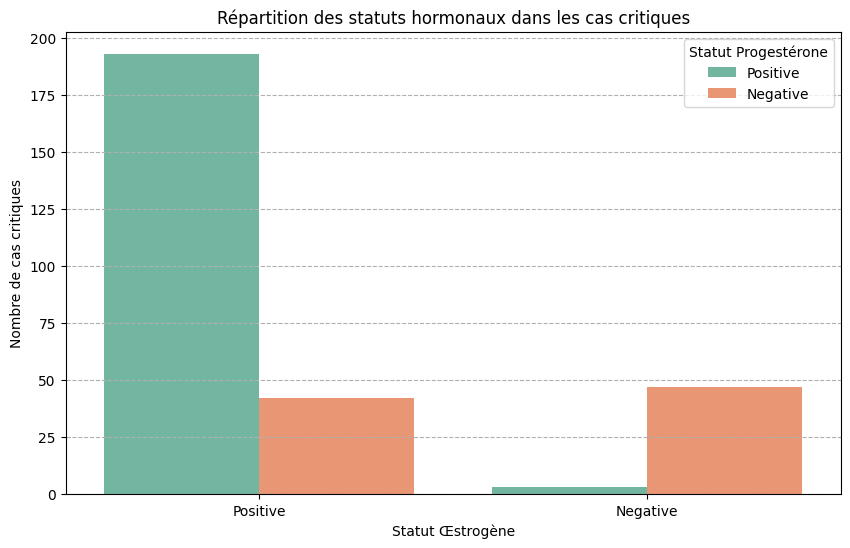

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(data=critical_cases, x='Estrogen Status', hue='Progesterone Status', palette='Set2')
plt.title('Répartition des statuts hormonaux dans les cas critiques')
plt.xlabel('Statut Œstrogène')
plt.ylabel('Nombre de cas critiques')
plt.legend(title='Statut Progestérone')
plt.grid(axis='y', linestyle='--')
plt.show()

#### Visualisation des cas critiques

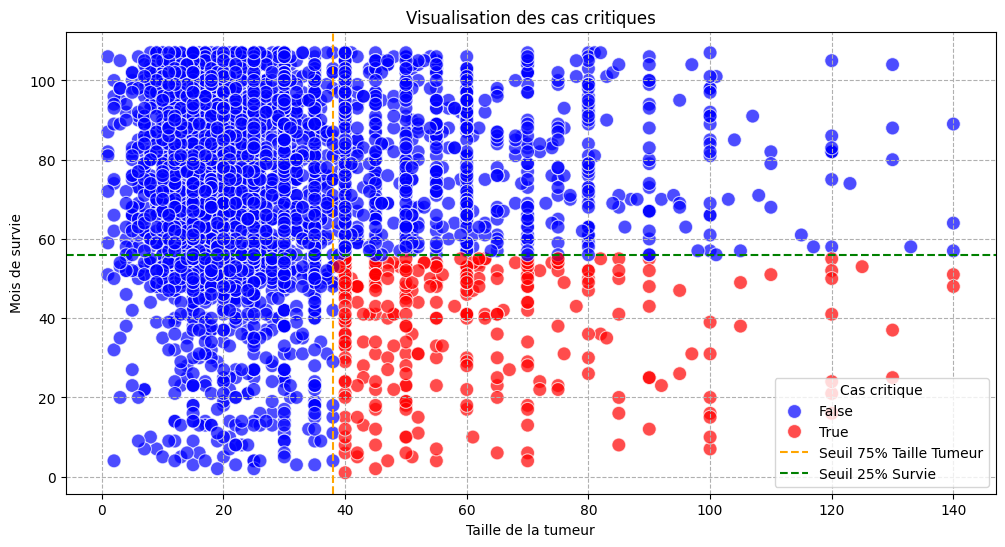

In [75]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=BC,
    x='Tumor Size',
    y='Survival Months',
    hue='Critical Case',
    palette={True: 'red', False: 'blue'},
    s=100,
    alpha=0.7
)
plt.axvline(tumor_threshold, color='orange', linestyle='--', label='Seuil 75% Taille Tumeur')
plt.axhline(survival_threshold, color='green', linestyle='--', label='Seuil 25% Survie')
plt.title('Visualisation des cas critiques')
plt.xlabel('Taille de la tumeur')
plt.ylabel('Mois de survie')
plt.legend(title='Cas critique')
plt.grid(axis='both', linestyle='--')
plt.show()


## Création des clusters

### Préparation des données pour le clustering

In [84]:
features = ['Age', 'Tumor Size', 'Reginol Node Positive', 'Survival Months']

clustering_data = BC[features].dropna()

# Standardisation des caractéristiques
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_data)

### Application du clustering K-Means

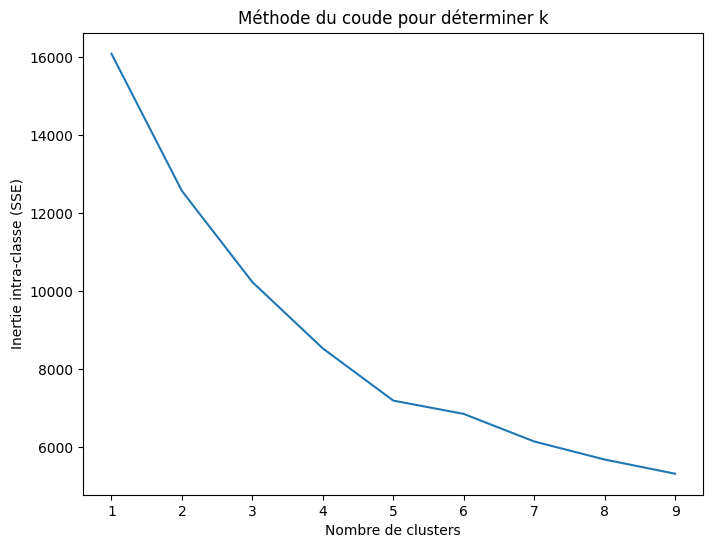

In [87]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse[k] = kmeans.inertia_

# Tracé de la courbe du coude
plt.figure(figsize=(8, 6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie intra-classe (SSE)')
plt.title('Méthode du coude pour déterminer k')
plt.show()


### Application de K-Means avec le nombre de clusters K=4

In [24]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

clustering_data['Cluster'] = clusters

### Visualisation des clusters en fonction de l'âge et des mois de survie

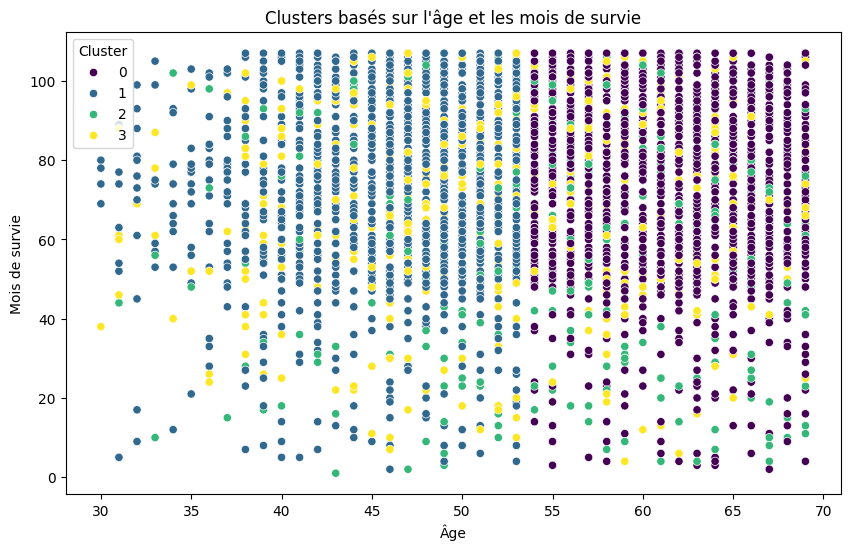

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustering_data, x='Age', y='Survival Months', hue='Cluster', palette='viridis')
plt.title('Clusters basés sur l\'âge et les mois de survie')
plt.xlabel('Âge')
plt.ylabel('Mois de survie')
plt.legend(title='Cluster')
plt.show()